로치의 데이터를 기반으로 k-최근접 이웃 회귀 알고리즘, 선형회귀알고리즘을 활용하여 로치의 특성을 가지고 무게를 예측하는 모델
Weight, Length1 컬럼 사용

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

# 1. 데이터 셋 준비하기

- https://drive.google.com/drive/folders/15eNbhGQAHmeicbjOKThSnFvuNBst-8ME?usp=share_link

- Fish.csv 파일 참조

- Weight, Length1 두개의 특성을 사용

In [11]:
csvData = pd.read_csv('Data\Roach.csv', header=0)
weight = np.array(csvData[["Weight"]].values.tolist())
length = np.array(csvData[["Length1"]].values.tolist())
print(weight)
print(length)

[[ 40]
 [ 69]
 [ 78]
 [ 87]
 [120]
 [110]
 [120]
 [150]
 [145]
 [160]
 [140]
 [160]
 [169]
 [161]
 [200]
 [180]
 [290]
 [272]
 [390]]
[[12.9]
 [16.5]
 [17.5]
 [18.2]
 [18.6]
 [19.1]
 [19.4]
 [20.4]
 [20.5]
 [20.5]
 [21. ]
 [21.1]
 [22. ]
 [22. ]
 [22.1]
 [23.6]
 [24. ]
 [25. ]
 [29.5]]


2. 데이터 산점도 출력

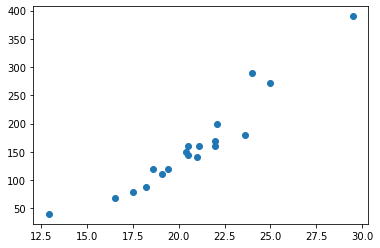

In [22]:
plt.scatter(length, weight)
plt.show()

3. 훈련 세트와 테스트 세트로 분활


In [13]:
train_input, test_input, train_target, test_target = train_test_split(length, weight, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

4. K-최근접 이웃 회귀 알고리즘 훈련/평가

In [18]:
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

5. 샘플 데이터 무게 예측 출력([40cm])

In [19]:
print(knr.predict([[40]]))

[[317.33333333]]


6. k-최근접 이웃 회귀 모델 K매개 변수 산점도로 출력

- 훈련 세트 중에서 이웃 샘플은 marker='D'로 출력

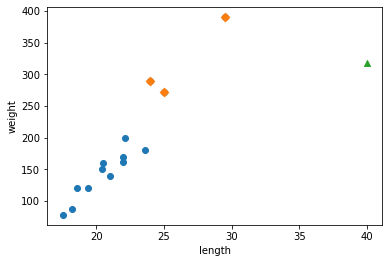

In [21]:
dintance, indexes = knr.kneighbors([[40]])

#훈련셋의 산점도
plt.scatter(train_input, train_target)

#훈련 셋 중에서 이웃 샘플만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker = "D")

#40cm 농어 데이터
plt.scatter(40, 317, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

7. 이웃 샘플의 타깃의 평균 값 확인

- mean() 평균값 확인

- predict() 사용으로 평균 값과 비교 확인 1/2

In [23]:
print(np.mean(train_target[indexes]), knr.predict([[100]]))

317.3333333333333 [[317.33333333]]


8. 선형 회귀 모델로 샘플 데이터 훈련 예측

- 40cm 로치에 대해 예측합니다.

In [38]:
lr = LinearRegression()

lr.fit(train_input, train_target)
print(lr.predict([[40]]), lr.coef_, lr.intercept_)

[[655.39052183]] [[25.98933375]] [-384.18282799]


9. 선형 회귀 모델의 산점도 출력

· 1차 방정식 그래프를 출력

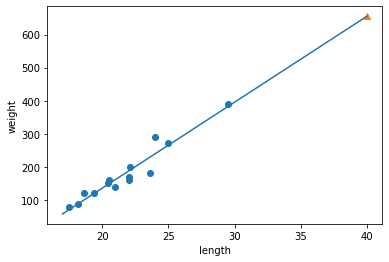

In [43]:
plt.scatter(train_input, train_target)

#15에서 50까지 1차 방정식 그래프를 그림
plt.plot([17, 40], [17 * lr.coef_[0] + lr.intercept_, 40 * lr.coef_[0] + lr.intercept_])

plt.scatter(40, 655.4, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

10. 결정 계수(R2) 점수 확인

. 훈련 세트와 테스트 세트의 R2확인

In [44]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9228157420682633
0.16077238705034036


11. 2차 방정식 그리기

. 훈련 세트와 테스트 세트 제곱근 생성

In [46]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape, test_poly.shape)

(14, 2) (5, 2)


12. 선형 회귀 모델 훈련

. 기울기, 절편 print()로 확인

- predict()사용으로 예측 샘플 값 확인

In [59]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.coef_, lr.intercept_)
print(lr.predict([[40**2, 40]]))

[[0.42140427 6.50684183]] [-163.74218693]
[[770.77831623]]


13. 2차 방정식으로 훈련 세트의 산점도 출력

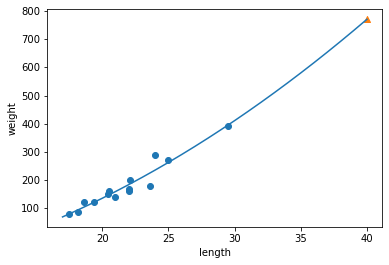

In [62]:
point = np.arange(17, 41)
plt.scatter(train_input, train_target)
plt.plot(point, 0.42140427 * point ** 2 + 6.50684183 *point-163.74218693)
plt.scatter(40, 771, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()


14. (최종) 훈련 세트, 테스트 세트로 결정계수(R2) 출력

In [63]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9269681763382803
0.7439718231139756
